In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from datetime import datetime
import pickle
import warnings
import ast
import re
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('trades_alg.csv')[['strategy', 'timestamp', 'trade_type', 'price', 'amount']]
strats = np.sort(df.strategy.unique())
df['timestamp'] = (df['timestamp'] // 1000 // 60) + 1
def plot_series(x):
    plt.plot(range(len(x)), x.to_list())

# BTC

algo0_b
algo1_b
algo2_b
algo3_b


,SR of Relative P&L to Buy&Hold,Traded%,Std of Inventory Value
Naive MM Strategy,25.604418,5.752841,2278.101740
Volatility Adjusted MM Strategy,2.467820,45.170455,3882.427083
Volatility and Inventory Adjusted MM Strategy,8.156948,44.034091,3443.739368
"Volatility, Inventory and Fair Price Adjusted MM Strategy",14.156547,43.536932,3494.082286


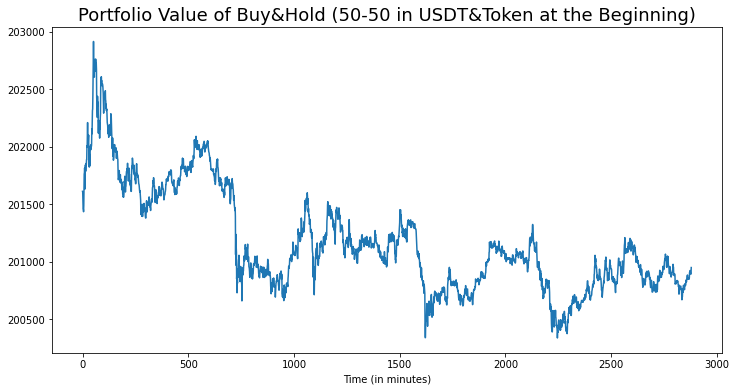

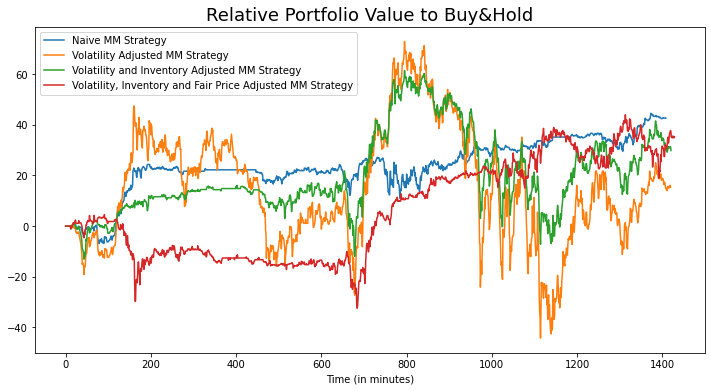

In [15]:
initial_inventory = {'BTC':2.3, 'ETH': 42, 'DOGE': 1000000, 'CYBER':14500}
coin = 'BTC'

plt.figure(figsize=(12,6))
DF = pd.read_csv('candles_binance_perpetual_'+coin+'-USDT_1m.csv')[['timestamp', 'open', 'close']]
plot_series(initial_inventory[coin] * DF['close'] + 100000)
plt.title('Portfolio Value of Buy&Hold (50-50 in USDT&Token at the Beginning)', fontsize=18)
plt.xlabel('Time (in minutes)')

SR, tradenum, inventorystd = [], [], []

plt.figure(figsize=(12,6))
for i in range(0, 16, 4):
    print(strats[i])
    DF = pd.read_csv('candles_binance_perpetual_'+coin+'-USDT_1m.csv')[['timestamp', 'open', 'close']]
    DF['timestamp'] = (DF['timestamp'] // 1000 // 60).astype(int)
    DF = DF[(DF['timestamp'] >= df['timestamp'].iloc[0]-1) & (DF['timestamp'] <= df['timestamp'].iloc[-1])].reset_index(drop=True)
    DF['pv_hold'] = initial_inventory[coin] * DF['close'] + 100000
    
    dfb = df[df['strategy']==strats[i]][df['trade_type']=='BUY'][['timestamp', 'price', 'amount']]
    dfb.columns = ['timestamp', 'buyprice', 'buyamount']
    dfs = df[df['strategy']==strats[i]][df['trade_type']=='SELL'][['timestamp', 'price', 'amount']]
    dfs.columns = ['timestamp', 'sellprice', 'sellamount']
    tradenum.append(100*(len(dfb)+len(dfs)) / (len(DF)-1))
    
    DF = pd.merge(DF, dfb, on='timestamp', how='left')
    DF = pd.merge(DF, dfs, on='timestamp', how='left')
    DF = DF.fillna(0)

    DF['inventory'] = ((DF['buyamount'] - DF['sellamount']).cumsum() + initial_inventory[coin]) * DF['close']
    DF['cash'] = (DF['sellprice'] * DF['sellamount'] - DF['buyprice'] * DF['buyamount']).cumsum() + 100000
    DF['relative_pv'] = DF['inventory'] + DF['cash'] - DF['pv_hold'] 
    plot_series(DF['relative_pv'])
    plt.xlabel('Time (in minutes)')
    
    relative_pnls = DF['relative_pv'].diff()[1:]
    SR.append(np.sqrt(365*24*60) * relative_pnls.mean() / relative_pnls.std())
    inventorystd.append(DF['inventory'].std())
    
names = ['Naive MM Strategy', 'Volatility Adjusted MM Strategy', 
     'Volatility and Inventory Adjusted MM Strategy', 
     'Volatility, Inventory and Fair Price Adjusted MM Strategy']
plt.title('Relative Portfolio Value to Buy&Hold', fontsize=18)
plt.legend(names)

df_params = pd.DataFrame(index=names)
df_params['SR of Relative P&L to Buy&Hold'] = SR
df_params['Traded%'] = tradenum
df_params['Std of Inventory Value'] = inventorystd
df_params

# ETH

algo0_e
algo1_e
algo2_e
algo3_e


,SR of Relative P&L to Buy&Hold,Traded%,Std of Inventory Value
Naive MM Strategy,2.498736,5.752841,1582.100202
Volatility Adjusted MM Strategy,-12.811821,27.627841,9771.221912
Volatility and Inventory Adjusted MM Strategy,-2.654657,25.568182,5270.007228
"Volatility, Inventory and Fair Price Adjusted MM Strategy",18.221279,26.704545,3774.025264


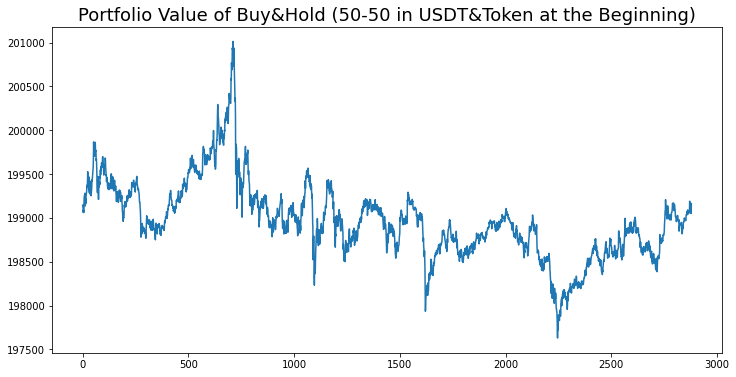

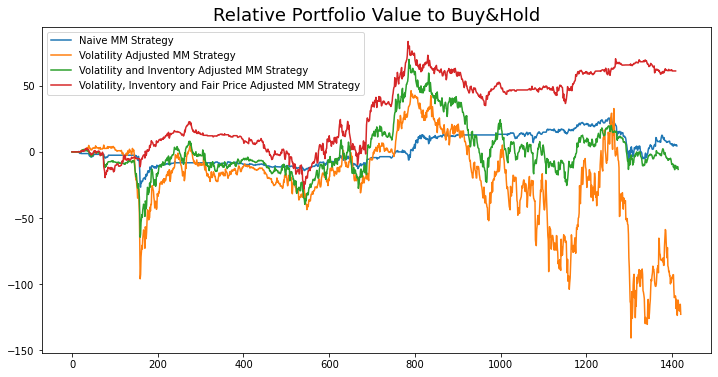

In [12]:
initial_inventory = {'BTC':2.3, 'ETH': 42, 'DOGE': 1000000, 'CYBER':14500}
coin = 'ETH'

plt.figure(figsize=(12,6))
DF = pd.read_csv('candles_binance_perpetual_'+coin+'-USDT_1m.csv')[['timestamp', 'open', 'close']]
plot_series(initial_inventory[coin] * DF['close'] + 100000)
plt.title('Portfolio Value of Buy&Hold (50-50 in USDT&Token at the Beginning)', fontsize=18)

SR, tradenum, inventorystd = [], [], []

plt.figure(figsize=(12,6))
for i in range(3, 16, 4):
    print(strats[i])
    DF = pd.read_csv('candles_binance_perpetual_'+coin+'-USDT_1m.csv')[['timestamp', 'open', 'close']]
    DF['timestamp'] = (DF['timestamp'] // 1000 // 60).astype(int)
    DF = DF[(DF['timestamp'] >= df['timestamp'].iloc[0]-1) & (DF['timestamp'] <= df['timestamp'].iloc[-1])].reset_index(drop=True)
    DF['pv_hold'] = initial_inventory[coin] * DF['close'] + 100000
    
    dfb = df[df['strategy']==strats[i]][df['trade_type']=='BUY'][['timestamp', 'price', 'amount']]
    dfb.columns = ['timestamp', 'buyprice', 'buyamount']
    dfs = df[df['strategy']==strats[i]][df['trade_type']=='SELL'][['timestamp', 'price', 'amount']]
    dfs.columns = ['timestamp', 'sellprice', 'sellamount']
    tradenum.append(100*(len(dfb)+len(dfs)) / (len(DF)-1))
    
    DF = pd.merge(DF, dfb, on='timestamp', how='left')
    DF = pd.merge(DF, dfs, on='timestamp', how='left')
    DF = DF.fillna(0)

    DF['inventory'] = ((DF['buyamount'] - DF['sellamount']).cumsum() + initial_inventory[coin]) * DF['close']
    DF['cash'] = (DF['sellprice'] * DF['sellamount'] - DF['buyprice'] * DF['buyamount']).cumsum() + 100000
    DF['relative_pv'] = DF['inventory'] + DF['cash'] - DF['pv_hold'] 
    plot_series(DF['relative_pv'])
    
    relative_pnls = DF['relative_pv'].diff()[1:]
    SR.append(np.sqrt(365*24*60) * relative_pnls.mean() / relative_pnls.std())
    inventorystd.append(DF['inventory'].std())
    
names = ['Naive MM Strategy', 'Volatility Adjusted MM Strategy', 
     'Volatility and Inventory Adjusted MM Strategy', 
     'Volatility, Inventory and Fair Price Adjusted MM Strategy']
plt.title('Relative Portfolio Value to Buy&Hold', fontsize=18)
plt.legend(names)

df_params = pd.DataFrame(index=names)
df_params['SR of Relative P&L to Buy&Hold'] = SR
df_params['Traded%'] = tradenum
df_params['Std of Inventory Value'] = inventorystd
df_params

# DOGE

algo0_d
algo1_d
algo2_d
algo3_d


,SR of Relative P&L to Buy&Hold,Traded%,Std of Inventory Value
Naive MM Strategy,25.860483,16.974432,6148.616778
Volatility Adjusted MM Strategy,7.018197,45.596591,8710.590851
Volatility and Inventory Adjusted MM Strategy,-21.399137,54.900568,4743.362597
"Volatility, Inventory and Fair Price Adjusted MM Strategy",-24.064253,55.184659,5153.773416


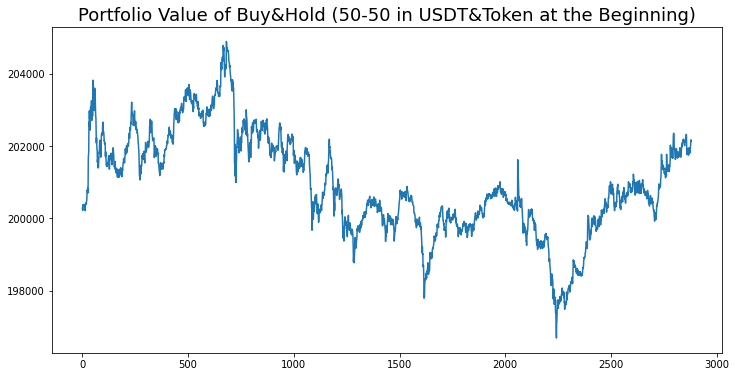

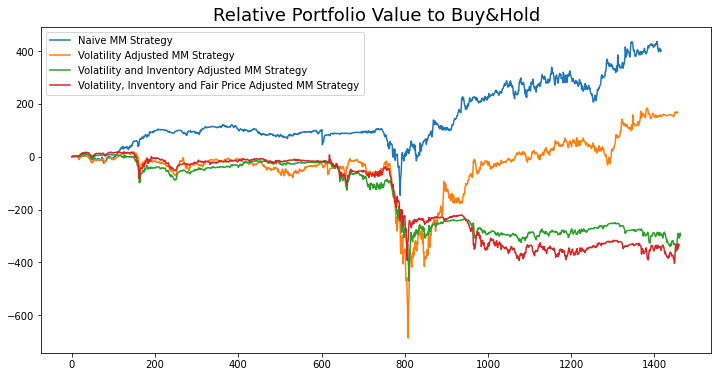

In [13]:
initial_inventory = {'BTC':2.3, 'ETH': 42, 'DOGE': 1000000, 'CYBER':14500}
coin = 'DOGE'

plt.figure(figsize=(12,6))
DF = pd.read_csv('candles_binance_perpetual_'+coin+'-USDT_1m.csv')[['timestamp', 'open', 'close']]
plot_series(initial_inventory[coin] * DF['close'] + 100000)
plt.title('Portfolio Value of Buy&Hold (50-50 in USDT&Token at the Beginning)', fontsize=18)

SR, tradenum, inventorystd = [], [], []

plt.figure(figsize=(12,6))
for i in range(2, 16, 4):
    print(strats[i])
    DF = pd.read_csv('candles_binance_perpetual_'+coin+'-USDT_1m.csv')[['timestamp', 'open', 'close']]
    DF['timestamp'] = (DF['timestamp'] // 1000 // 60).astype(int)
    DF = DF[(DF['timestamp'] >= df['timestamp'].iloc[0]-1) & (DF['timestamp'] <= df['timestamp'].iloc[-1])].reset_index(drop=True)
    DF['pv_hold'] = initial_inventory[coin] * DF['close'] + 100000
    
    dfb = df[df['strategy']==strats[i]][df['trade_type']=='BUY'][['timestamp', 'price', 'amount']]
    dfb.columns = ['timestamp', 'buyprice', 'buyamount']
    dfs = df[df['strategy']==strats[i]][df['trade_type']=='SELL'][['timestamp', 'price', 'amount']]
    dfs.columns = ['timestamp', 'sellprice', 'sellamount']
    tradenum.append(100*(len(dfb)+len(dfs)) / (len(DF)-1))
    
    DF = pd.merge(DF, dfb, on='timestamp', how='left')
    DF = pd.merge(DF, dfs, on='timestamp', how='left')
    DF = DF.fillna(0)

    DF['inventory'] = ((DF['buyamount'] - DF['sellamount']).cumsum() + initial_inventory[coin]) * DF['close']
    DF['cash'] = (DF['sellprice'] * DF['sellamount'] - DF['buyprice'] * DF['buyamount']).cumsum() + 100000
    DF['relative_pv'] = DF['inventory'] + DF['cash'] - DF['pv_hold'] 
    plot_series(DF['relative_pv'])
    
    relative_pnls = DF['relative_pv'].diff()[1:]
    SR.append(np.sqrt(365*24*60) * relative_pnls.mean() / relative_pnls.std())
    inventorystd.append(DF['inventory'].std())
    
names = ['Naive MM Strategy', 'Volatility Adjusted MM Strategy', 
     'Volatility and Inventory Adjusted MM Strategy', 
     'Volatility, Inventory and Fair Price Adjusted MM Strategy']
plt.title('Relative Portfolio Value to Buy&Hold', fontsize=18)
plt.legend(names)

df_params = pd.DataFrame(index=names)
df_params['SR of Relative P&L to Buy&Hold'] = SR
df_params['Traded%'] = tradenum
df_params['Std of Inventory Value'] = inventorystd
df_params

# CYBER

algo0_c
algo1_c
algo2_c
algo3_c


,SR of Relative P&L to Buy&Hold,Traded%,Std of Inventory Value
Naive MM Strategy,32.794231,2.272727,1612.388261
Volatility Adjusted MM Strategy,23.311791,12.286932,4817.012912
Volatility and Inventory Adjusted MM Strategy,21.493345,9.517045,4114.881810
"Volatility, Inventory and Fair Price Adjusted MM Strategy",18.641632,14.417614,14647.867177


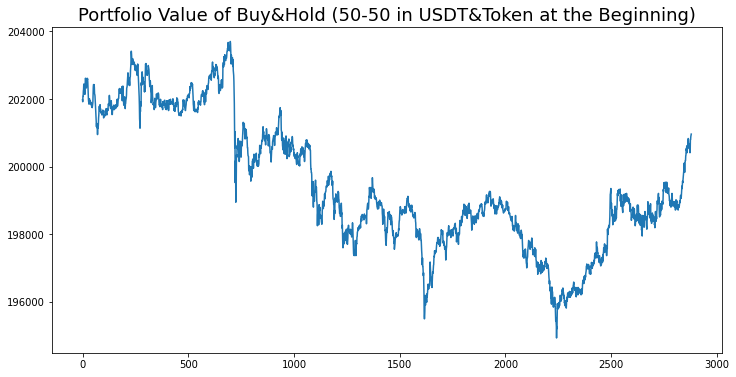

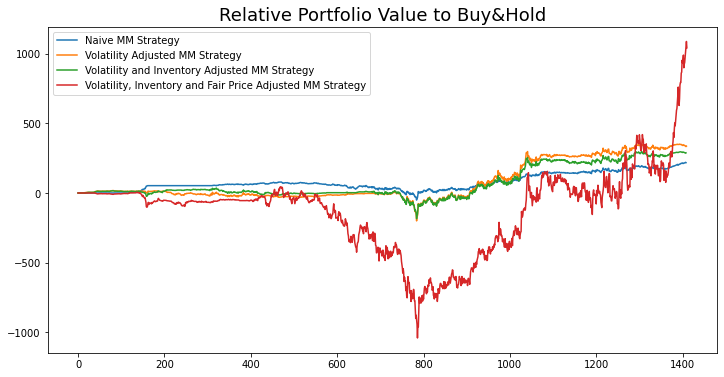

In [14]:
initial_inventory = {'BTC':2.3, 'ETH': 42, 'DOGE': 1000000, 'CYBER':14500}
coin = 'CYBER'

plt.figure(figsize=(12,6))
DF = pd.read_csv('candles_binance_perpetual_'+coin+'-USDT_1m.csv')[['timestamp', 'open', 'close']]
plot_series(initial_inventory[coin] * DF['close'] + 100000)
plt.title('Portfolio Value of Buy&Hold (50-50 in USDT&Token at the Beginning)', fontsize=18)

SR, tradenum, inventorystd = [], [], []

plt.figure(figsize=(12,6))
for i in range(1, 16, 4):
    print(strats[i])
    DF = pd.read_csv('candles_binance_perpetual_'+coin+'-USDT_1m.csv')[['timestamp', 'open', 'close']]
    DF['timestamp'] = (DF['timestamp'] // 1000 // 60).astype(int)
    DF = DF[(DF['timestamp'] >= df['timestamp'].iloc[0]-1) & (DF['timestamp'] <= df['timestamp'].iloc[-1])].reset_index(drop=True)
    DF['pv_hold'] = initial_inventory[coin] * DF['close'] + 100000
    
    dfb = df[df['strategy']==strats[i]][df['trade_type']=='BUY'][['timestamp', 'price', 'amount']]
    dfb.columns = ['timestamp', 'buyprice', 'buyamount']
    dfs = df[df['strategy']==strats[i]][df['trade_type']=='SELL'][['timestamp', 'price', 'amount']]
    dfs.columns = ['timestamp', 'sellprice', 'sellamount']
    tradenum.append(100*(len(dfb)+len(dfs)) / (len(DF)-1))
    
    DF = pd.merge(DF, dfb, on='timestamp', how='left')
    DF = pd.merge(DF, dfs, on='timestamp', how='left')
    DF = DF.fillna(0)

    DF['inventory'] = ((DF['buyamount'] - DF['sellamount']).cumsum() + initial_inventory[coin]) * DF['close']
    DF['cash'] = (DF['sellprice'] * DF['sellamount'] - DF['buyprice'] * DF['buyamount']).cumsum() + 100000
    DF['relative_pv'] = DF['inventory'] + DF['cash'] - DF['pv_hold'] 
    plot_series(DF['relative_pv'])
    
    relative_pnls = DF['relative_pv'].diff()[1:]
    SR.append(np.sqrt(365*24*60) * relative_pnls.mean() / relative_pnls.std())
    inventorystd.append(DF['inventory'].std())
    
names = ['Naive MM Strategy', 'Volatility Adjusted MM Strategy', 
     'Volatility and Inventory Adjusted MM Strategy', 
     'Volatility, Inventory and Fair Price Adjusted MM Strategy']
plt.title('Relative Portfolio Value to Buy&Hold', fontsize=18)
plt.legend(names)

df_params = pd.DataFrame(index=names)
df_params['SR of Relative P&L to Buy&Hold'] = SR
df_params['Traded%'] = tradenum
df_params['Std of Inventory Value'] = inventorystd
df_params